In [2]:
import interpretdl as it

# SG and Evalaution

W0106 16:47:17.606997 72279 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.2, Runtime API Version: 10.2
W0106 16:47:17.612716 72279 device_context.cc:465] device: 0, cuDNN Version: 7.6.
INFO:paddle.utils.download:unique_endpoints {'10.255.129.23:35230'}
INFO:paddle.utils.download:File /root/.cache/paddle/hapi/weights/resnet50.pdparams md5 checking...
INFO:paddle.utils.download:Found /root/.cache/paddle/hapi/weights/resnet50.pdparams
/root/codespace/InterpretDL-master/interpretdl/interpreter/abc_interpreter.py:82: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/nn/layer/norm.py:653: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")
/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dyg

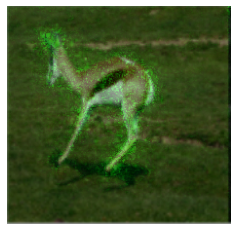

In [4]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, use_cuda=True)
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

In [6]:
evaluator = it.DeletionInsertion(paddle_model, 'gpu:0', use_cuda=True)
r = evaluator.evaluate(img_path, exp)

# LIME and Evaluation

INFO:paddle.utils.download:unique_endpoints {'10.255.129.23:35230'}
INFO:paddle.utils.download:File /root/.cache/paddle/hapi/weights/resnet50.pdparams md5 checking...
INFO:paddle.utils.download:Found /root/.cache/paddle/hapi/weights/resnet50.pdparams
100%|██████████| 2000/2000 [00:18<00:00, 106.46it/s]


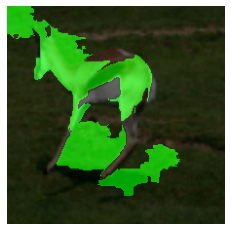

In [4]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, use_cuda=True)
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [5]:
evaluator = it.DeletionInsertion(paddle_model, 'gpu:0', use_cuda=True)
r = evaluator.evaluate(img_path, lime.lime_results)

/root/codespace/InterpretDL-master/interpretdl/evaluate_interpreter/deletion_insertion.py:16: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  super().__init__(paddle_model, device, use_cuda, **kwargs)


# Plots

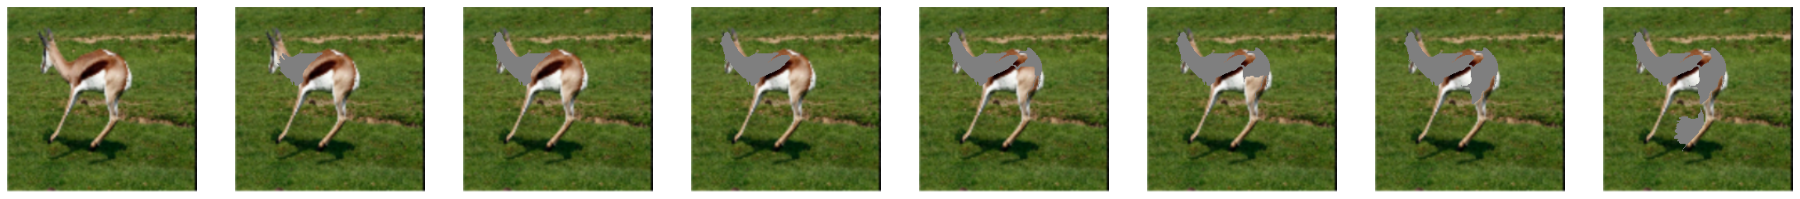

In [12]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['deletion_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0, 0.5, 'Probability')

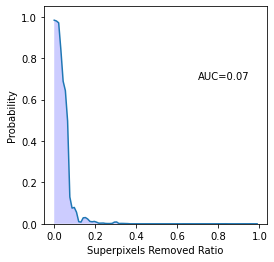

In [16]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(np.arange(len(r['del_probas'])) / len(r['del_probas']), r['del_probas'])
ax.text(0.7, 0.7, f"AUC={np.mean(r['del_probas']):.2f}")
ax.fill_between(x = np.arange(len(r['del_probas'])) / len(r['del_probas']),
                 y1 = 0,
                 y2 = r['del_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
ax.set_ylim((0, 1.05))
ax.set_xlabel('Superpixels Removed Ratio')
ax.set_ylabel('Probability')